In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("/content/drive/MyDrive/traffic_congestion.csv")

In [4]:
print(df.head())

   sensor_count  avg_speed time_of_day congestion_level
0             4  21.723781     morning           medium
1            17  17.319749     morning              low
2             3  54.550117       night             high
3            13  59.453301       night             high
4             9  12.211030     evening           medium


In [5]:
print(df.shape)

(100, 4)


In [6]:
print(df.describe);

<bound method NDFrame.describe of     sensor_count  avg_speed time_of_day congestion_level
0              4  21.723781     morning           medium
1             17  17.319749     morning              low
2              3  54.550117       night             high
3             13  59.453301       night             high
4              9  12.211030     evening           medium
..           ...        ...         ...              ...
95            14  15.144772   afternoon              low
96            18  21.883053     morning           medium
97            15  46.384176     evening              low
98             2  33.590222   afternoon             high
99            10  68.021836     evening             high

[100 rows x 4 columns]>


In [7]:
print(df.dtypes)

sensor_count          int64
avg_speed           float64
time_of_day          object
congestion_level     object
dtype: object



Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.00      0.00      0.00         1
      Medium       0.98      1.00      0.99       123

    accuracy                           0.98       125
   macro avg       0.33      0.33      0.33       125
weighted avg       0.97      0.98      0.98       125



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 600x500 with 0 Axes>

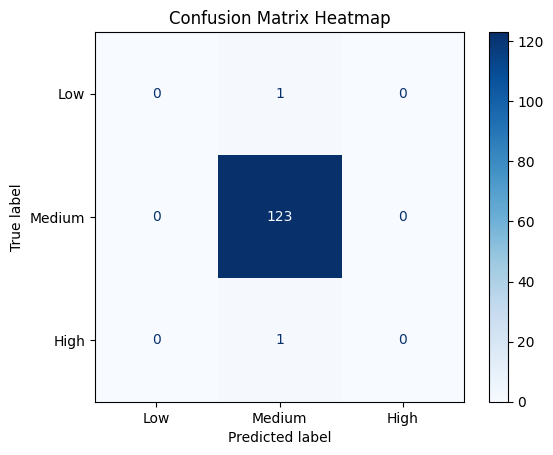

In [8]:
# 1. Simulate dataset
np.random.seed(42)
n_samples = 500

data = {
    'vehicle_count': np.random.poisson(lam=50, size=n_samples),
    'average_speed': np.random.normal(loc=40, scale=10, size=n_samples),
    'time_of_day': np.random.choice([0, 1, 2], size=n_samples),  # 0 = Morning, 1 = Afternoon, 2 = Night
    'day_of_week': np.random.choice(range(7), size=n_samples),   # 0 = Monday ... 6 = Sunday
    'weather_conditions': np.random.choice([0, 1], size=n_samples),  # 0 = Clear, 1 = Rainy
}

# Define congestion level based on conditions (rough logic)
conditions = (
    (data['vehicle_count'] > 60) & (data['average_speed'] < 30)
)
labels = np.where(conditions, 'High', 'Medium')
labels = np.where((data['vehicle_count'] < 40) & (data['average_speed'] > 50), 'Low', labels)

df = pd.DataFrame(data)
df['congestion'] = labels

# 2. Preprocess data
X = df.drop('congestion', axis=1)
y = df['congestion']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, stratify=y, random_state=42)

# 3. Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 4. Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.show()
